### Week 14 Homework
##### Angela Spencer - January 5, 2022

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [2]:
#import data
bottle_df = pd.read_csv('../Datasets/bottle.csv', low_memory=False)
cast_df = pd.read_csv('../Datasets/cast.csv', low_memory = False)

### 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

##### A. Exploratory Analysis

In [3]:
print(bottle_df.shape)
print(bottle_df.columns)
print(bottle_df.dtypes)

(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   i

In [4]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### B. Drop Existing Redundant Columns

In [5]:
#columns to drop
#redundant columns
column_drop = ['Sta_ID', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd', 'T_prec', 
                'S_prec', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_POTEMP']
bottle_df.drop(column_drop, axis=1, inplace=True)

##### C. Fill and Drop NaNs

In [6]:
bottle_df.isna().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Depth_ID                    0
O2ml_L                 168662
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
T_qual                 841736
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
NO2q                   335389
NO3uM                  527460
NO3q                   334930
NH3uM                  799901
C14As1                 850431
C14A1p                 852103
C14As2                 850449
C14A2p                 852121
DarkAs                 842214
DarkAp                 844406
MeanAs                 842213
MeanAp    

In [7]:
#drop columns with very little data
bottle_df.dropna(axis=1, thresh=700000, inplace=True)
print(bottle_df.shape)
print(bottle_df.columns)

(864863, 10)
Index(['Cst_Cnt', 'Btl_Cnt', 'Depth_ID', 'R_Depth', 'R_TEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')


In [8]:
#drop rows with 3+ null values
bottle_df.dropna(axis=0, thresh=9, inplace=True)
print(bottle_df.shape)
bottle_df.isnull().sum()

(812092, 10)


Cst_Cnt          0
Btl_Cnt          0
Depth_ID         0
R_Depth          0
R_TEMP           0
R_SALINITY       0
R_SIGMA         85
R_SVA            0
R_DYNHT       4886
R_PRES           0
dtype: int64

In [9]:
#reset index after dropping rows
bottle_df.reset_index(drop=True, inplace=True)

In [10]:
#view metrics to determine best value to fill NaNs:

#most frequent value
print(bottle_df[['R_SALINITY', 'R_SIGMA', 'R_SVA','R_DYNHT']].value_counts().head(1))

#mean and median value
bottle_df[['R_SALINITY', 'R_SIGMA', 'R_SVA','R_DYNHT']].agg([np.mean, np.median])

R_SALINITY  R_SIGMA  R_SVA  R_DYNHT
33.55       24.87    306.5  0.0        6
dtype: int64


,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT
mean,33.840672,25.81101,220.938918,0.433203
median,33.865000,25.99000,203.200000,0.340000


In [11]:
#variable to hold labels for post transformation
labels = bottle_df.columns
labels

Index(['Cst_Cnt', 'Btl_Cnt', 'Depth_ID', 'R_Depth', 'R_TEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [12]:
#instantiate Imputer transformer
#replace NaNs with most frequent value
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent', copy=False)
bottle2 = imp.fit_transform(bottle_df)

#convert to dataframe
bottle_df = pd.DataFrame(bottle2, columns = labels)

#no null values remaining
bottle_df.isnull().sum()

Cst_Cnt       0
Btl_Cnt       0
Depth_ID      0
R_Depth       0
R_TEMP        0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

##### D. Convert categorical values to numerical

In [13]:
bottle_df.dtypes

Cst_Cnt       object
Btl_Cnt       object
Depth_ID      object
R_Depth       object
R_TEMP        object
R_SALINITY    object
R_SIGMA       object
R_SVA         object
R_DYNHT       object
R_PRES        object
dtype: object

In [14]:
#convert numerical values to integer and float types
bottle_df = bottle_df.convert_dtypes(convert_string=False, convert_boolean=False)
bottle_df.dtypes

Cst_Cnt         Int64
Btl_Cnt         Int64
Depth_ID       object
R_Depth         Int64
R_TEMP        Float64
R_SALINITY    Float64
R_SIGMA       Float64
R_SVA         Float64
R_DYNHT       Float64
R_PRES          Int64
dtype: object

##### E. Feature Engineering - encoding categorical variables

In [15]:
#extract year from Depth_ID (first two digits-second two digits)
#extract station ID for location information(first three digits.one digit)
bottle_df[['Depth_ID']]

,Depth_ID
0,19-4903CR-HY-060-0930-05400560-0000A-3
1,19-4903CR-HY-060-0930-05400560-0008A-3
2,19-4903CR-HY-060-0930-05400560-0010A-7
3,19-4903CR-HY-060-0930-05400560-0019A-3
4,19-4903CR-HY-060-0930-05400560-0020A-7
...,...
812087,20-1611SR-MX-310-2239-09340264-0000A-7
812088,20-1611SR-MX-310-2239-09340264-0002A-3
812089,20-1611SR-MX-310-2239-09340264-0005A-3
812090,20-1611SR-MX-310-2239-09340264-0010A-3


In [16]:
#extract year from Depth_ID column
#example to see the code working
example = '19-4903CR-HY-060-0930-05400560-0000A-3'
pattern = re.compile("\d+\-+\d{2}")
year = re.match(pattern, example)
year_str = str(year.group(0)).replace('-', '')
year_int = int(year_str)
year_int

1949

In [17]:
def extract_year(ex):
    pattern = re.compile("\d+\-+\d{2}")
    year = re.match(pattern, ex)
    year_str = str(year.group(0)).replace('-', '')
    return int(year_str)

#apply function to Depth_ID column, create new column for extracted year
bottle_df['YEAR'] = bottle_df['Depth_ID'].apply(lambda row: extract_year(row))
#convert year to datetime
pd.to_datetime(bottle_df['YEAR'], format='%Y').dt.year
bottle_df[['YEAR', 'Depth_ID']].head()

,YEAR,Depth_ID
0,1949,19-4903CR-HY-060-0930-05400560-0000A-3
1,1949,19-4903CR-HY-060-0930-05400560-0008A-3
2,1949,19-4903CR-HY-060-0930-05400560-0010A-7
3,1949,19-4903CR-HY-060-0930-05400560-0019A-3
4,1949,19-4903CR-HY-060-0930-05400560-0020A-7


In [18]:
#drop redundant Depth_ID column, Cast Count, and Bottle Count
bottle_df.drop('Depth_ID', axis=1, inplace=True)
bottle_df

,Cst_Cnt,Btl_Cnt,R_Depth,R_TEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES,YEAR
0,1,1,0,10.5,33.44,25.64,233.0,0.0,0,1949
1,1,2,8,10.46,33.44,25.65,232.5,0.01,8,1949
2,1,3,10,10.46,33.437,25.65,232.8,0.02,10,1949
3,1,4,19,10.45,33.42,25.64,234.1,0.04,19,1949
4,1,5,20,10.45,33.421,25.64,234.0,0.04,20,1949
...,...,...,...,...,...,...,...,...,...,...
812087,34404,864859,0,18.74,33.408,23.871,402.4,0.0,0,2016
812088,34404,864860,2,18.74,33.408,23.871,402.5,0.008,2,2016
812089,34404,864861,5,18.69,33.415,23.889,400.8,0.02,5,2016
812090,34404,864862,10,18.16,33.406,24.014,389.1,0.04,10,2016


##### F. Normalize data

In [19]:
#view variance 
bottle_df.agg([np.mean, np.var])

,Cst_Cnt,Btl_Cnt,R_Depth,R_TEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES,YEAR
mean,1.779213e+04,4.482971e+05,221.328430,10.863040,33.840672,25.811132,220.938918,0.430596,222.812100,1975.249155
var,1.016212e+08,6.042763e+10,94356.333362,17.814629,0.212775,1.264835,8739.202810,0.146568,96381.439819,412.081239


In [20]:
#log normalize columns with high variance
columns_to_log_norm = ['R_Depth', 'R_SVA', 'R_PRES']

#take log of column value +1 to avoid dividing by 0 errors
for column in columns_to_log_norm:
    bottle_df['log_'+column] = np.log(bottle_df[column]+1)

#drop redundant columns
bottle_df.drop(columns_to_log_norm, axis=1, inplace=True)

In [21]:
#preprocessed dataframe
bottle_df

,Cst_Cnt,Btl_Cnt,R_TEMP,R_SALINITY,R_SIGMA,R_DYNHT,YEAR,log_R_Depth,log_R_SVA,log_R_PRES
0,1,1,10.5,33.44,25.64,0.0,1949,0.0,5.455321,0.0
1,1,2,10.46,33.44,25.65,0.01,1949,2.197225,5.453182,2.197225
2,1,3,10.46,33.437,25.65,0.02,1949,2.397895,5.454466,2.397895
3,1,4,10.45,33.42,25.64,0.04,1949,2.995732,5.460011,2.995732
4,1,5,10.45,33.421,25.64,0.04,1949,3.044522,5.459586,3.044522
...,...,...,...,...,...,...,...,...,...,...
812087,34404,864859,18.74,33.408,23.871,0.0,2016,0.0,5.999929,0.0
812088,34404,864860,18.74,33.408,23.871,0.008,2016,1.098612,6.000176,1.098612
812089,34404,864861,18.69,33.415,23.889,0.02,2016,1.791759,5.995954,1.791759
812090,34404,864862,18.16,33.406,24.014,0.04,2016,2.397895,5.966403,2.397895


#### Preprocessing Cast.csv

##### A. Exploratory Analysis

In [22]:
cast_df.head(3)
cast_df[['Bottom_D']]

,Bottom_D
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
34399,4125.0
34400,4192.0
34401,3731.0
34402,4149.0


In [23]:
print(cast_df.shape)
cast_df.columns

(34404, 61)


Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')

##### B. Drop Existing Redundant Columns

In [24]:
drop_columns = ['Cruise_ID', 'Cruise', 'Cruz_Sta', 'Cast_ID', 'Sta_ID', 'DbSta_ID', 
                'Sta_Code',  'Date', 'Month', 'Julian_Date', 'Julian_Day', 'Event_Num', 
                'Time', 'Lat_Dec', 'Lat_Min', 'Lat_Hem', 'Lon_Dec', 'Lon_Min', 'Lon_Hem', 
                'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Data_Type',
                'Ship_Name', 'Ship_Code', 'Order_Occ', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 
                'PST_LAN', 'Civil_T', 'TimeZone']
cast_df.drop(drop_columns, axis=1, inplace=True)


In [25]:
cast_df

,Cst_Cnt,Quarter,Distance,Year,Lat_Deg,Lon_Deg,Bottom_D,Secchi,ForelU,Cruz_Leg,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1,NaN,1949,38,-124,NaN,NaN,NaN,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1,NaN,1949,38,-125,NaN,NaN,NaN,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1,NaN,1949,38,-126,NaN,NaN,NaN,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1,NaN,1949,38,-127,NaN,NaN,NaN,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1,NaN,1949,38,-128,NaN,NaN,NaN,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,4,-254.345,2016,30,-121,4125.0,NaN,NaN,1.0,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,4,-294.297,2016,30,-122,4192.0,NaN,NaN,1.0,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,4,-334.157,2016,30,-122,3731.0,NaN,NaN,1.0,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,4,-373.979,2016,29,-123,4149.0,25.0,NaN,1.0,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


##### C. Fill / Drop Null Values

In [26]:
#view number of null values by column
cast_df.isnull().sum()

Cst_Cnt           0
Quarter           0
Distance      14690
Year              0
Lat_Deg           0
Lon_Deg           0
Bottom_D       2281
Secchi        29141
ForelU        32327
Cruz_Leg      32940
IntChl        22201
IntC14        32275
Inc_Str       32271
Inc_End       32271
Wave_Dir      21846
Wave_Ht       22306
Wave_Prd      22770
Wind_Dir       1476
Wind_Spd       1679
Barometer     15341
Dry_T         15333
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
dtype: int64

In [27]:
#drop columns with mostly null values
cast_df.dropna(axis=1, thresh = 27000, inplace=True)

cast_df.shape

(34404, 8)

In [28]:
#drop rows with 2 or more null values
cast_df.dropna(axis=0, thresh=6, inplace=True)

cast_df.shape

(33930, 8)

In [29]:
cast_df.isnull().sum()

Cst_Cnt        0
Quarter        0
Year           0
Lat_Deg        0
Lon_Deg        0
Bottom_D    1807
Wind_Dir    1002
Wind_Spd    1205
dtype: int64

In [30]:
#reset index after dropping rows
cast_df.reset_index(drop=True, inplace=True)
cast_df.shape

(33930, 8)

In [31]:
cast_df.dtypes

Cst_Cnt       int64
Quarter       int64
Year          int64
Lat_Deg       int64
Lon_Deg       int64
Bottom_D    float64
Wind_Dir    float64
Wind_Spd    float64
dtype: object

In [32]:
#column labels to apply after imputer transformation
cast_labels = ['Cst_Cnt', 'Quarter', 'Year', 'Lat_Deg', 'Lon_Deg', 
               'Bottom_D', 'Wind_Dir', 'Wind_Spd']

In [33]:
#view metrics to determine best value to fill NaNs:
#most frequent value
print(cast_df[['Bottom_D', 'Wind_Dir', 'Wind_Spd']].value_counts().head(1))

#mean and median value
cast_df[['Bottom_D', 'Wind_Dir', 'Wind_Spd']].agg([np.mean, np.median])

Bottom_D  Wind_Dir  Wind_Spd
3658.0    32.0      8.0         61
dtype: int64


,Bottom_D,Wind_Dir,Wind_Spd
mean,2249.632693,27.067602,11.135951
median,2103.000000,31.000000,10.000000


In [34]:
#instantiate Imputer transformer
#replace NaNs with most frequent value
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent', copy=False)
cast2 = imp.fit_transform(cast_df)

#convert to dataframe
cast_df = pd.DataFrame(cast2, columns = cast_labels)

#no null values remaining
cast_df.isnull().sum()

Cst_Cnt     0
Quarter     0
Year        0
Lat_Deg     0
Lon_Deg     0
Bottom_D    0
Wind_Dir    0
Wind_Spd    0
dtype: int64

In [35]:
#convert numerical values to integer and float types
cast_df = cast_df.convert_dtypes(convert_string=False, convert_boolean=False)
cast_df.dtypes

Cst_Cnt     Int64
Quarter     Int64
Year        Int64
Lat_Deg     Int64
Lon_Deg     Int64
Bottom_D    Int64
Wind_Dir    Int64
Wind_Spd    Int64
dtype: object

##### D. Feature engineering - encoding variables

In [36]:
#'Quarter' is a categorical value for spring
# one hot encode and add to original df
#y = pd.get_dummies(cast_df['Quarter'], prefix='Quarter')

cast_df = pd.concat([cast_df, pd.get_dummies(cast_df['Quarter'], prefix='Quarter')], axis=1)
cast_df

,Cst_Cnt,Quarter,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,1,1949,38,-124,3658,23,18,1,0,0,0
1,2,1,1949,38,-125,3658,16,5,1,0,0,0
2,3,1,1949,38,-126,3658,23,5,1,0,0,0
3,4,1,1949,38,-127,3658,18,8,1,0,0,0
4,5,1,1949,38,-128,3658,27,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33925,34400,4,2016,30,-121,4125,34,16,0,0,0,1
33926,34401,4,2016,30,-122,4192,36,14,0,0,0,1
33927,34402,4,2016,30,-122,3731,35,16,0,0,0,1
33928,34403,4,2016,29,-123,4149,36,16,0,0,0,1


In [37]:
#drop duplicate column
cast_df.drop('Quarter', axis=1, inplace=True)
cast_df

,Cst_Cnt,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,1949,38,-124,3658,23,18,1,0,0,0
1,2,1949,38,-125,3658,16,5,1,0,0,0
2,3,1949,38,-126,3658,23,5,1,0,0,0
3,4,1949,38,-127,3658,18,8,1,0,0,0
4,5,1949,38,-128,3658,27,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
33925,34400,2016,30,-121,4125,34,16,0,0,0,1
33926,34401,2016,30,-122,4192,36,14,0,0,0,1
33927,34402,2016,30,-122,3731,35,16,0,0,0,1
33928,34403,2016,29,-123,4149,36,16,0,0,0,1


##### E. Normalizing Data

In [38]:
#variance is low so normalization is not necessary
cast_df.agg([np.mean, np.var])

,Cst_Cnt,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
mean,1.712811e+04,1973.886944,31.291188,-119.248276,2.324638e+03,27.213263,11.024580,0.278957,0.270793,0.250015,0.200236
var,9.945035e+07,393.772240,13.541780,16.178034,2.548621e+06,87.479997,45.242934,0.201146,0.197470,0.187513,0.160146


### Merge Bottle and Cast Dataframes

In [39]:
df = pd.merge(bottle_df, cast_df, on='Cst_Cnt')
df

,Cst_Cnt,Btl_Cnt,R_TEMP,R_SALINITY,R_SIGMA,R_DYNHT,YEAR,log_R_Depth,log_R_SVA,log_R_PRES,Year,Lat_Deg,Lon_Deg,Bottom_D,Wind_Dir,Wind_Spd,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,1,1,10.5,33.44,25.64,0.0,1949,0.0,5.455321,0.0,1949,38,-124,3658,23,18,1,0,0,0
1,1,2,10.46,33.44,25.65,0.01,1949,2.197225,5.453182,2.197225,1949,38,-124,3658,23,18,1,0,0,0
2,1,3,10.46,33.437,25.65,0.02,1949,2.397895,5.454466,2.397895,1949,38,-124,3658,23,18,1,0,0,0
3,1,4,10.45,33.42,25.64,0.04,1949,2.995732,5.460011,2.995732,1949,38,-124,3658,23,18,1,0,0,0
4,1,5,10.45,33.421,25.64,0.04,1949,3.044522,5.459586,3.044522,1949,38,-124,3658,23,18,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807497,34404,864859,18.74,33.408,23.871,0.0,2016,0.0,5.999929,0.0,2016,32,-117,20,25,2,0,0,0,1
807498,34404,864860,18.74,33.408,23.871,0.008,2016,1.098612,6.000176,1.098612,2016,32,-117,20,25,2,0,0,0,1
807499,34404,864861,18.69,33.415,23.889,0.02,2016,1.791759,5.995954,1.791759,2016,32,-117,20,25,2,0,0,0,1
807500,34404,864862,18.16,33.406,24.014,0.04,2016,2.397895,5.966403,2.397895,2016,32,-117,20,25,2,0,0,0,1


In [43]:
#drop duplicate year column
df.drop('Year', axis=1, inplace=True)

### 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

Looking at the heatmap below shows the absolute value of correlation between columns in the combined dataframe.  Correlation is present between Temperature, Salinity, Sigma, Dynamic Height, Depth, SVA, and Pressure. There is  also slight correlation between Bottom Depth and Longitude and Salinity and Latitude. Based on this visualization I would choose the first set of columns (Temperature, Salinity, Sigma, Dynamic Height, Depth, SVA, and Pressure) to analyze.

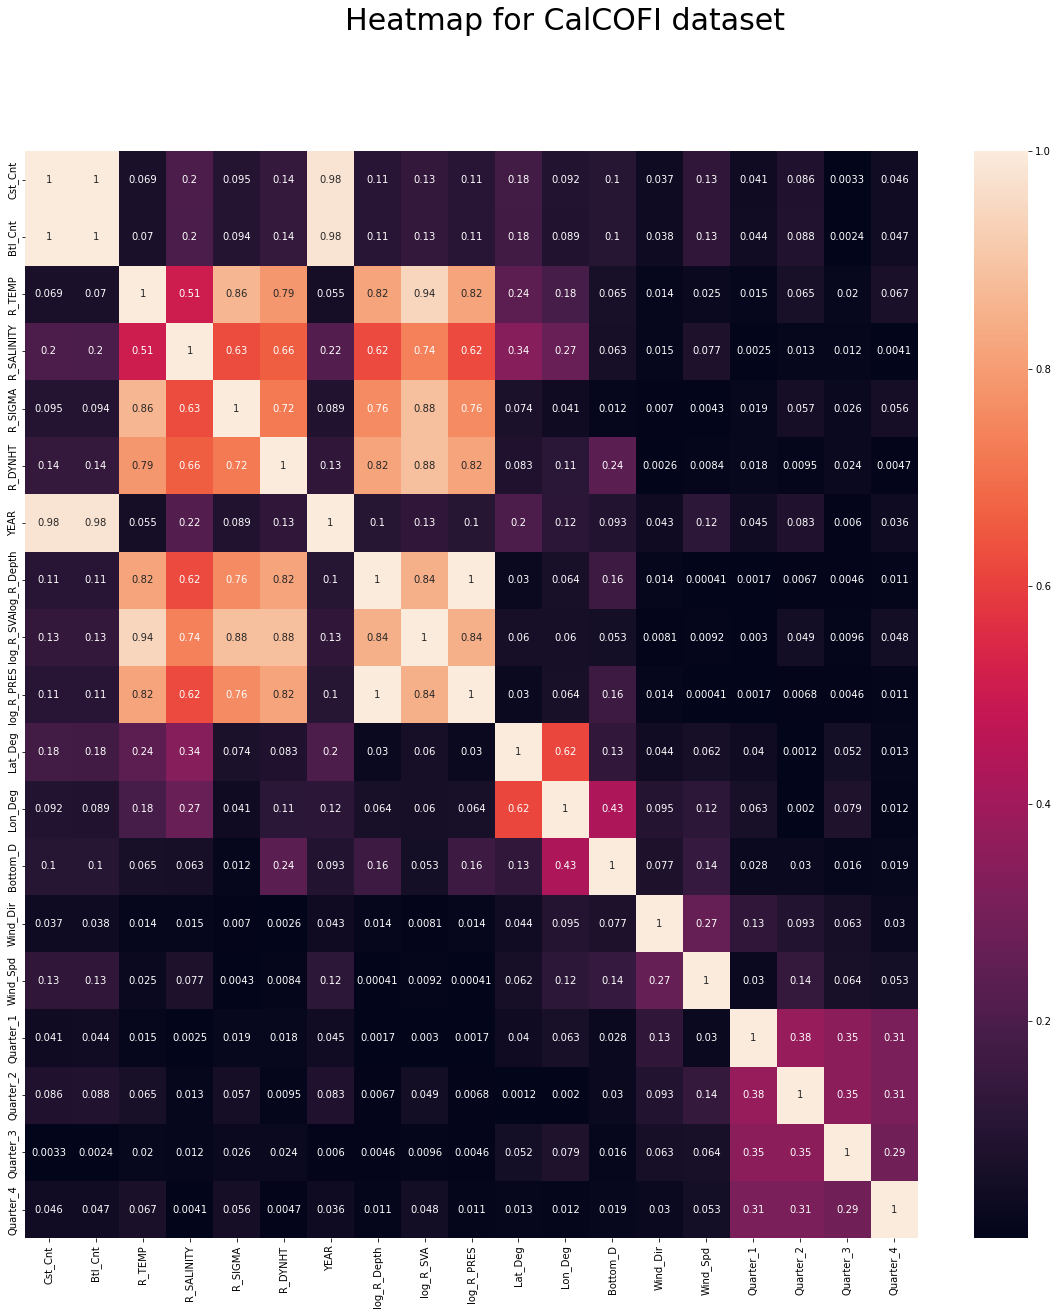

In [46]:
corr_matrix = abs(df.corr())

fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle('Heatmap for CalCOFI dataset', fontsize=30)
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

### 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

### 5.	Work with the diabetes dataset to perform multiple logistic regression. 

### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

### 7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

### 8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 